#                                              Feature extraction

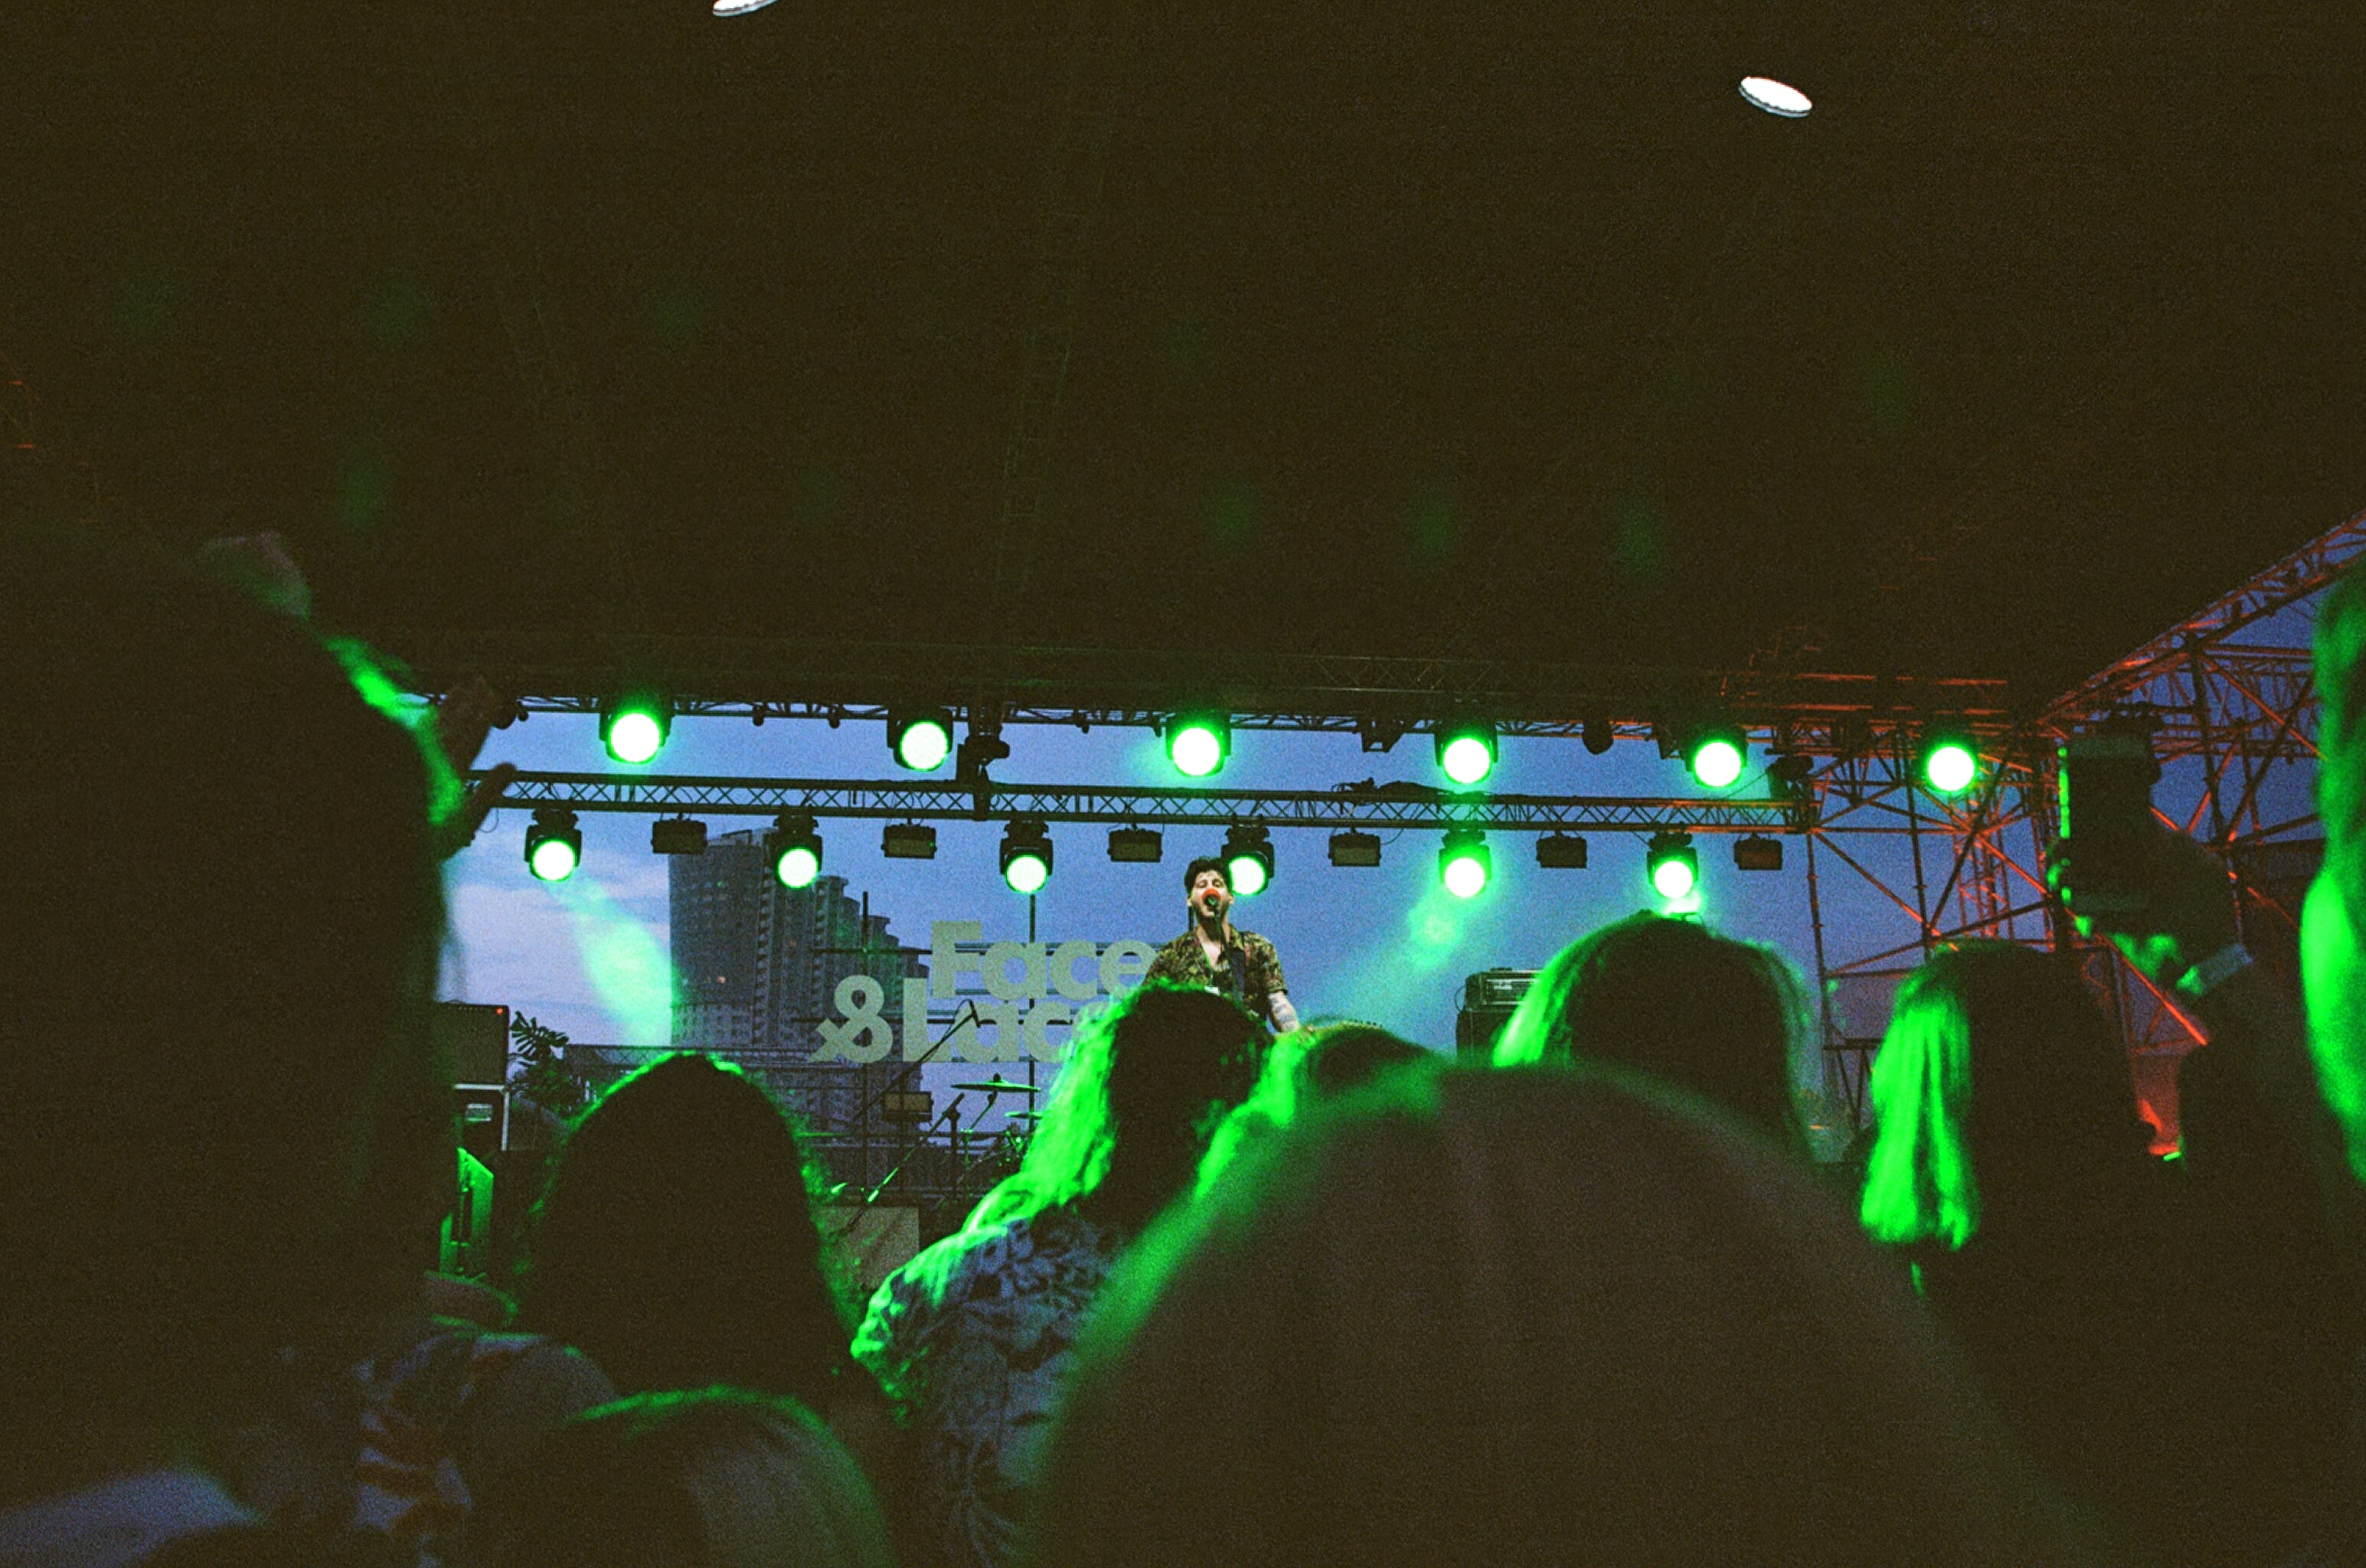

In [3]:
header = 'filename chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmonics_mean harmonics_var perceptual_mean perceptual_var spectral_contrast1_mean spectral_contrast1_var spectral_constrast2_mean spectral_contrast2_var spectral_constrast3_mean spectral_contrast3_var  spectral_constrast4_mean spectral_contrast4_var spectral_constrast5_mean spectral_contrast5_var spectral_contrast6_mean spectral_contrast6_var spectral_contrast7_mean spectral_contrast7_var spectral_flatness_mean spectral_flatness_var tonnetz_1_mean tonnetz_1_var tonnetz_2_mean tonnetz_2_var tonnetz_3_mean tonnetz_3_var tonnetz_4_mean tonnetz_4_var tonnetz_5_mean tonnetz_5_var tonnetz_6_mean tonnetz_6_var '
for i in range(1, 21):
    header += f'mfcc_mean{i} '
    header+=  f'mfcc_var{i} '
for j in range(1,129):
    header += f'mel_specgram_mean{j} '
    header += f'mel_specgram_var{j} '
header +='  tempo'
header += ' label'
header = header.split()

In [4]:
len(header)

343

In [7]:
file = open('music.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'final_blues final_classical final_country final_disco final_hiphop final_jazz final_metal final_pop final_reggae final_rock'.split()
for g in genres:
    for filename in os.listdir(f'./final_genres/{g}'):
        songname = f'./final_genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        harmonics, perceptual = librosa.effects.hpss(y)
        tempo=librosa.beat.tempo(y=y,sr=sr)
        spectral_contrast=librosa.feature.spectral_contrast(y,sr=sr)
        #Spectral flatness
        spectral_flatness=librosa.feature.spectral_flatness(y=y)
        mel_spectrogram=librosa.feature.melspectrogram(y=y,sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rms)} {np.var(rms)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harmonics)} {np.var(harmonics)} {np.mean(perceptual)} {np.var(perceptual)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.var(e)}'
        for j in range(0,7):
            to_append += f' {np.mean(spectral_contrast[j])}'
            to_append += f' {np.var(spectral_contrast[j])}'
            j=0
    
        to_append += f' {np.mean(spectral_flatness)}'
        to_append += f' {np.var(spectral_flatness)}'
        y_harmonic=librosa.effects.harmonic(y=y)
        tonnetz=librosa.feature.tonnetz(y=y_harmonic,sr=sr)
        for k in range(0,6):
            to_append += f' {np.mean(tonnetz[j])}'
            to_append += f' {np.var(tonnetz[j])}'
            k=0
        for l in range(0,128):
            to_append += f' {np.mean(mel_spectrogram[j])}'
            to_append += f' {np.var(mel_spectrogram[j])}'
        to_append += f' {float(tempo)}'
        to_append += f' {g}'
        file = open('music.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\Users\PROMIT\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1011
  warnings.warn(


In [8]:
import pandas as pd
data=pd.read_csv('music.csv')
data.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mel_specgram_mean125,mel_specgram_var125,mel_specgram_mean126,mel_specgram_var126,mel_specgram_mean127,mel_specgram_var127,mel_specgram_mean128,mel_specgram_var128,tempo,label
0,final_blues00.wav,0.335434,0.091088,0.130405,0.003521,1773.285877,168244.728448,1972.723622,117298.851326,3714.477539,...,5.875805,121.360504,5.875805,121.360504,5.875805,121.360504,5.875805,121.360504,129.199219,final_blues
1,final_blues01.wav,0.343020,0.086142,0.112699,0.001450,1816.195860,90703.325185,2009.201575,65548.531475,3868.771221,...,6.676786,97.969818,6.676786,97.969818,6.676786,97.969818,6.676786,97.969818,123.046875,final_blues
2,final_blues02.wav,0.346838,0.092210,0.132002,0.004620,1788.642783,111322.537051,2085.045996,74755.260660,3995.568660,...,6.897610,69.025826,6.897610,69.025826,6.897610,69.025826,6.897610,69.025826,123.046875,final_blues
3,final_blues03.wav,0.363671,0.086856,0.132562,0.002447,1654.902168,112316.264385,1959.202709,83672.222326,3566.395358,...,5.599164,74.678688,5.599164,74.678688,5.599164,74.678688,5.599164,74.678688,123.046875,final_blues
4,final_blues04.wav,0.335927,0.088291,0.143289,0.001701,1630.737017,79648.228297,1948.459295,60221.595017,3469.910044,...,7.565843,126.943962,7.565843,126.943962,7.565843,126.943962,7.565843,126.943962,123.046875,final_blues


In [9]:
data.shape

(10000, 343)